In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
from RRNN import RRNN
import matplotlib.pyplot as plt

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



In [2]:
net = RRNN(ring=True, recurrent=True)

In [3]:
net.sim_params['b_input']

10.0

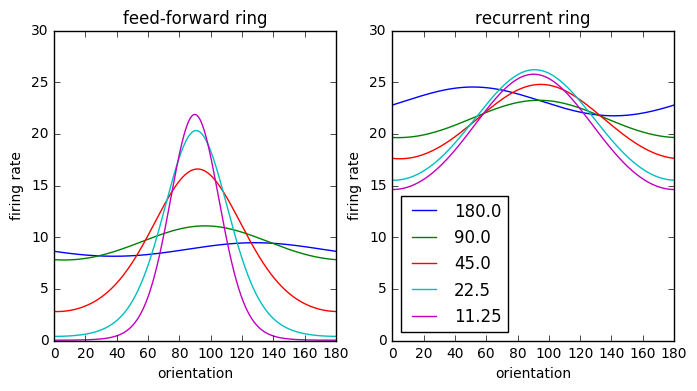

In [4]:
bw_values = 180*np.logspace(0, -4, 5, base=2)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i in range(2):
    for bw_value in bw_values:
        if i==0:
            net = RRNN(ring=True, recurrent=False)
        else:
            net = RRNN(ring=True, recurrent=True)

        net.sim_params['b_input'] = bw_value
        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        #print(result.best_fit.mean())
        axs[i].plot(theta*180/np.pi, result.best_fit, label=str(bw_value))

    axs[i].set_xlabel('orientation')
    axs[i].set_ylabel('firing rate')
    axs[i].axis('tight')
    axs[i].set_ylim([0, 30])
axs[0].set_title('feed-forward ring')
axs[1].set_title('recurrent ring')

plt.legend(loc='best')
plt.show()

fig.savefig('../figs/ring_feed-forward_vs_recurrent.png', dpi = 600)

In [5]:
bw_values = 180*np.logspace(-1, -10, 15, base=2)

def HWHH(k):
    """
    See http://motionclouds.invibe.net/posts/testing-grating.html#tuning-the-bandwidth
    
    """
    return .5*np.arccos(1+ np.log((1+np.exp(-2*k))/2)/k)

HWHH_in = HWHH(1/np.sqrt(bw_values/180*np.pi))

print(bw_values, HWHH_in)

[ 90.          57.63990104  36.91509102  23.64202437  15.14137717
   9.69719424   6.21050351   3.97747564   2.54734781   1.63143195
   1.04483973   0.66916065   0.42855949   0.27446807   0.17578125] [ 0.59984506  0.56160008  0.51928125  0.4743863   0.42891964  0.38492686
  0.3439743   0.30686562  0.27371709  0.24424961  0.21806033  0.19475953
  0.17400578  0.15550407  0.13899833]


In [6]:
BW= np.zeros((2, len(bw_values)))
for i in range(2):
    for i_bw, bw_value in enumerate(bw_values):
        if i==0:
            net = RRNN(ring=True, recurrent=False)
        else:
            net = RRNN(ring=True, recurrent=True)

        net.sim_params['b_input'] = bw_value
        
        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        BW[i, i_bw] = result.params['sigma'].value

ValueError: The input contains nan values

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(HWHH_in, HWHH(1/np.sqrt(BW[0, :])), 'k.', label='feed-forward ring')
ax.plot(HWHH_in, HWHH(1/np.sqrt(BW[1, :])), 'r.', label='recurrent ring')
        
ax.set_xlabel('HWHH in')
ax.set_ylabel('HWHH out')

plt.legend(loc='best')
ax.axis('tight')
ax.set_xlim([0, .7])
ax.set_ylim([0, .7])
plt.show()

fig.savefig('../figs/ring_feed-forward_vs_recurrent_BW.png', dpi = 600)